# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 


## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for regression
* Apply inverse transformations to be able to use these in a regression context


In [1]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 8.4/8.4 MB 13.4 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In the following cell we load the data and define some useful plotting functions.


In [36]:
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

### Loading in Boston Data


In [30]:
headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

boston_data = pd.read_csv('housing.csv', sep='\s+', names= headers)

In [31]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### Determining Normality


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test


#### Visually


Plotting a histogram:


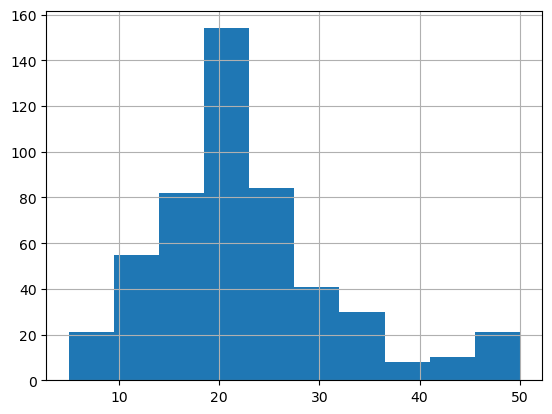

In [32]:
boston_data.MEDV.hist();

Does not look normal due to that right tail. Let's try to verify statistically:


In [33]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [34]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696098e-20)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!


Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox


### Testing log


The log transform can transform data that is significantly skewed right to be more normally distributed:


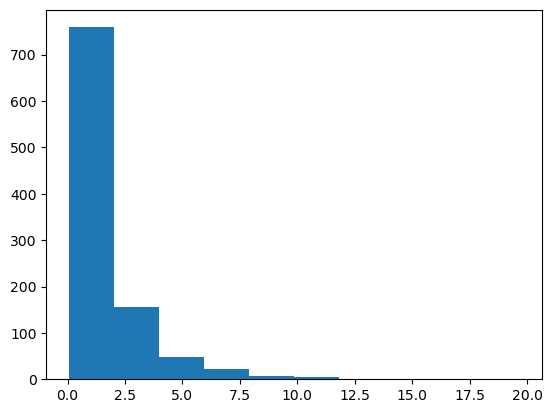

In [37]:
data = plot_exponential_data()

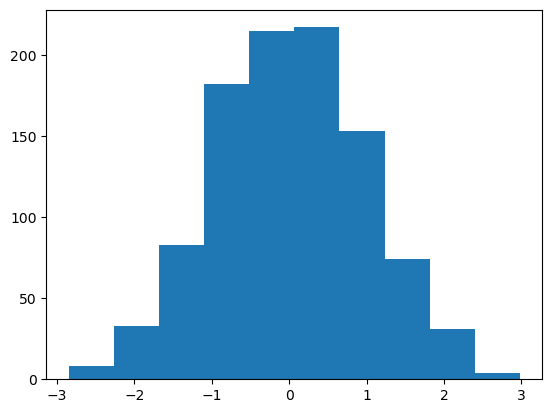

In [38]:
plt.hist(np.log(data));

**Apply transform to Boston data:**


In [39]:
log_medv = np.log(boston_data.MEDV)

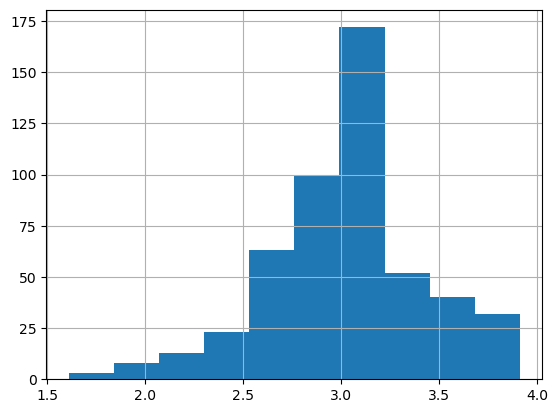

In [40]:
log_medv.hist();

In [41]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

Conclusion: closer, but still not normal.


### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


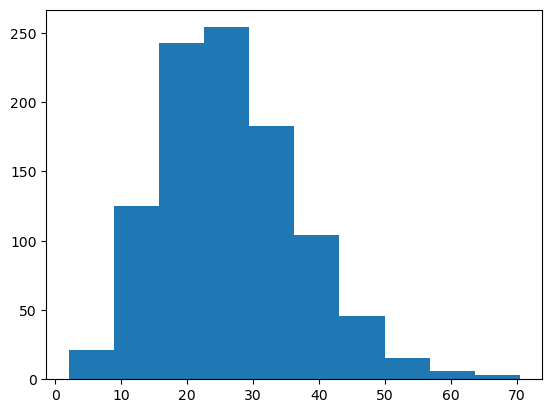

In [42]:
data = plot_square_normal_data()

Slightly skewed right.


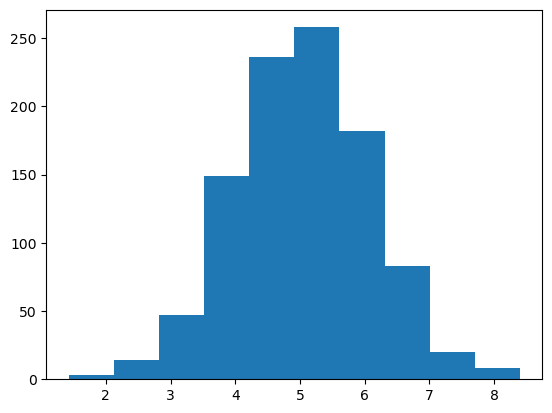

In [43]:
plt.hist(np.sqrt(data));

Apply the square root transformation to the Boston data target and test whether the result is normally distributed.


In [44]:
pass # your code here

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

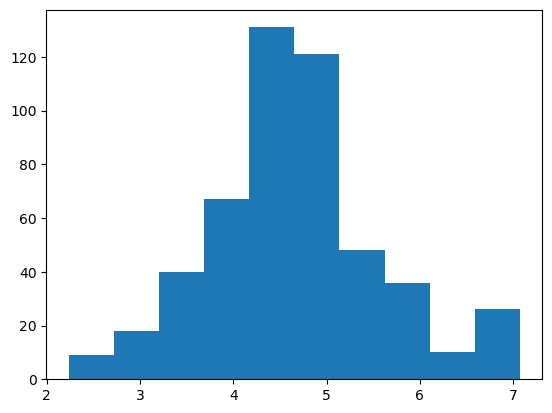

In [45]:
# Instructor Solution

sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

In [46]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [47]:
from scipy.stats import boxcox

In [48]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [49]:
lam

0.2166209012915364

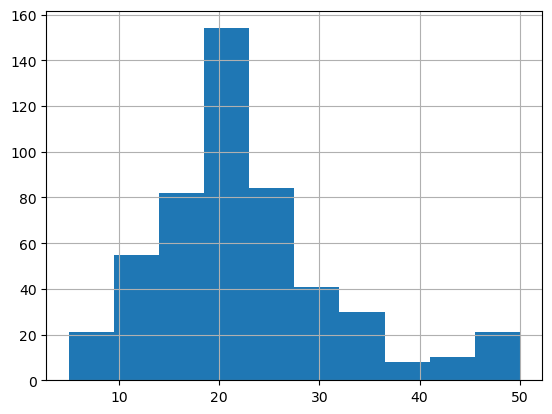

In [50]:
boston_data['MEDV'].hist();

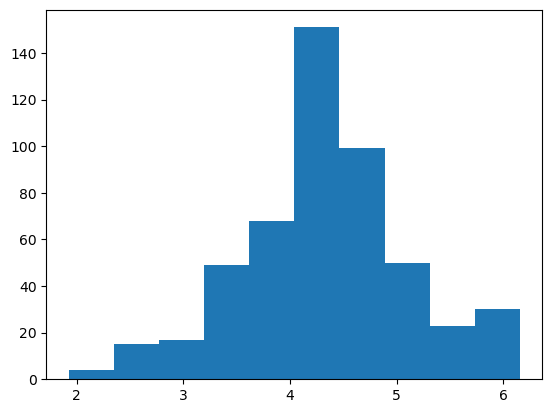

In [51]:
plt.hist(boxcox_medv);

In [52]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!


### Testing regression:


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [54]:
lr = LinearRegression()

**Reload clean version of `boston_data`:**


In [56]:
boston_data = boston_data

Same steps as before.


**Create X and y**


In [57]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Create Polynomial Features**


In [75]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [58]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [76]:
X_pf

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [77]:
X.shape

(506, 13)

In [78]:
X_pf.shape

(506, 104)

**Train test split**


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

In [80]:
X_train.shape

(354, 104)

**Fit `StandardScaler` on `X_train` as before**


In [83]:
X_train

array([[3.47428000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.25705703e+05, 1.87556950e+03, 2.79841000e+01],
       [3.70500000e-02, 2.00000000e+01, 3.33000000e+00, ...,
        1.53844373e+05, 1.80033570e+03, 2.10681000e+01],
       [1.23290000e-01, 0.00000000e+00, 1.00100000e+01, ...,
        1.55985503e+05, 6.40213950e+03, 2.62764100e+02],
       ...,
       [1.41500000e-01, 0.00000000e+00, 6.91000000e+00, ...,
        1.46972557e+05, 2.22737970e+03, 3.37561000e+01],
       [2.24890000e-01, 1.25000000e+01, 7.87000000e+00, ...,
        1.54071950e+05, 8.02703400e+03, 4.18202500e+02],
       [3.22640000e-01, 0.00000000e+00, 2.18900000e+01, ...,
        1.43073062e+05, 6.39242500e+03, 2.85610000e+02]])

In [84]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [85]:
X_train_s

array([[-0.0124666 , -0.48401192,  1.03845365, ..., -0.23484375,
        -0.91219534, -0.7707125 ],
       [-0.41008423,  0.38254628, -1.1262321 , ...,  0.43979833,
        -0.94167211, -0.80076846],
       [-0.40010802, -0.48401192, -0.14721377, ...,  0.49113324,
         0.86132485,  0.24960827],
       ...,
       [-0.39800149, -0.48401192, -0.60154862, ...,  0.27504228,
        -0.77435532, -0.7456282 ],
       [-0.38835496,  0.05758695, -0.46085138, ...,  0.44525464,
         1.49796212,  0.92512164],
       [-0.37704727, -0.48401192,  1.59391465, ...,  0.18154948,
         0.85751868,  0.34889333]])

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [86]:
pass # your code here

In [87]:
# Instructor Solution
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [88]:
y_train_bc.shape

(354,)

In [90]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [91]:
y_pred_bc.shape

(152,)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Inverse transform


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [92]:
from scipy.special import inv_boxcox

In [93]:
# code from above
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [98]:
boxcox_medv[:10]

array([4.57293637, 4.36558166, 5.33694273, 5.25495447, 5.42860689,
       4.93592663, 4.48001683, 4.81796329, 3.85654088, 4.10949441])

In [99]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [100]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Should be two lines of code.


In [101]:
pass # your code here

In [102]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.8794001851338596

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?


In [71]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

0.8555202098064144

---
### Machine Learning Foundation (C) 2020 IBM Corporation
